-----------------------------------------------------------------------------------------------------------------------
# **Employee Attrition Prediction**
-----------------------------------------------------------------------------------------------------------------------

-----------------------
## **Objective** 
-----------------------

* To predict the probability for the target variable Attrition.

------------------------------------
## **Dataset Description**
------------------------------------

Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

* **EmployeeNumber** - Unique Employee Identifier
* **Attrition** - Did the employee attrite or not?
* **Age** - Age of the employee
* **BusinessTravel** - Travel commitments for the job
* **DailyRate** - Data description not available
* **Department** - Employee's Department
* **DistanceFromHome** - Distance from work to home (in KM)
* **Education** - Employee's Education. 1-Below College, 2-College, 3-Bachelor, 4-Master, 5-Doctor
* **EducationField** - Field of Education
* **EnvironmentSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **Gender** - Employee's gender
* **HourlyRate** - Data description not available
* **JobInvolvement** - 1-Low, 2-Medium, 3-High, 4-Very High
* **JobLevel** - Level of job (1 to 5)
* **JobRole** - Job Roles
* **JobSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **MaritalStatus** - Marital Status
* **MonthlyIncome** - Monthly Salary
* **MonthlyRate** - Data description not available
* **NumCompaniesWorked** - Number of companies worked at
* **Over18** - Whether the employee is over 18 years of age?
* **OverTime** - Whether the employee is doing overtime?
* **PercentSalaryHike** - The percentage increase in the salary last year
* **PerformanceRating** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **RelationshipSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **StandardHours** - Standard Hours
* **StockOptionLevel** - Stock Option Level
* **TotalWorkingYears** - Total years worked
* **TrainingTimesLastYear** - Number of training attended last year
* **WorkLifeBalance** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **YearsAtCompany** - Years at Company
* **YearsInCurrentRole** - Years in the current role
* **YearsSinceLastPromotion** - Years since the last promotion
* **YearsWithCurrManager** - Years with the current manager

## **Importing the libraries and overview of the dataset**

In [34]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics

from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

### **Loading the Dataset**

In [24]:
# Loading the dataset
df = pd.read_csv('train.csv')

In [3]:
# Looking at the first 5 records
df.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1


### **Checking the info of the dataset**

In [4]:
# Let us see the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

**Observations:**

- There are **1677 observations and 35 columns** in the dataset.
- All the columns have 1677 non-null values, i.e., **there are no missing values in the data.**

**Let's check the unique values in each column** 

In [5]:
# Checking the count of unique values in each column
df.nunique()

id                          1677
Age                           43
BusinessTravel                 3
DailyRate                    625
Department                     3
DistanceFromHome              29
Education                      6
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       6
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome                895
MonthlyRate                  903
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             41
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

**Observations:**

- **id is an identifier** which is unique for each employee and **we can drop this column** as it would not add any value to our analysis.
- **EmployeeCount, Over18 and StandardHours have only 1 unique value.** These columns will not add any value to our model hence we can drop them.
- On the basis of number of unique values in each column and the data description, we can identify the continuous and categorical columns in the data.

**Let's drop the columns mentioned above** and define lists for numerical and categorical columns to explore them separately.

In [25]:
# Dropping the columns
df = df.drop(['id', 'EmployeeCount', 'Over18', 'StandardHours'] , axis = 1)

In [26]:
# Creating numerical columns
n = (df.dtypes == 'int64')
num_cols = list(n[n].index)

# Creating categorical variables
c = (df.dtypes == 'object')
cat_cols = list(c[c].index)

## **Exploratory Data Analysis and Data Preprocessing**

### **Univariate analysis of numerical columns**

In [27]:
# Checking summary statistics
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1677.0,36.036971,8.507112,18.0,30.0,35.0,41.0,60.0
DailyRate,1677.0,892.749553,374.496259,107.0,589.0,890.0,1223.0,3921.0
DistanceFromHome,1677.0,8.683959,7.826143,1.0,2.0,7.0,12.0,29.0
Education,1677.0,2.937984,1.039078,1.0,2.0,3.0,4.0,15.0
EnvironmentSatisfaction,1677.0,2.757901,1.086835,1.0,2.0,3.0,4.0,4.0
HourlyRate,1677.0,67.798450,19.435928,30.0,51.0,69.0,84.0,100.0
JobInvolvement,1677.0,2.782349,0.650664,1.0,2.0,3.0,3.0,4.0
JobLevel,1677.0,1.998807,1.083065,1.0,1.0,2.0,2.0,7.0
JobSatisfaction,1677.0,2.791890,1.097396,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,1677.0,6196.049493,4520.050754,1010.0,2875.0,4834.0,7403.0,19973.0


**Observations:**

- **Average employee age is around 36 years**. It has a high range, from 18 years to 60, indicating good age diversity in the organization.
- **At least 50% of the employees live within a 7 KM radius** of the organization. However, there are some extreme values, given that the maximum value is 29 km.
- **The average monthly income of an employee is USD 6500.** It has a high range of values from 1K-20K USD, which is to be expected for any organization's income distribution. There is a big difference between the 3rd quartile value (around USD 8400) and the maximum value (nearly USD 20000), showing that the **company's highest earners have a disproportionately large income** in comparison to the rest of the employees. Again, this is fairly common in most organizations.
- **The average salary hike of an employee is around 15%.** At least 50% of employees got a salary hike of 14% or less, with the maximum salary hike being 25%.
- The average number of years an employee is associated with the company is 7. 
- **On average, the number of years since an employee got a promotion is ~2.19**. The majority of employees have been promoted since the last year.

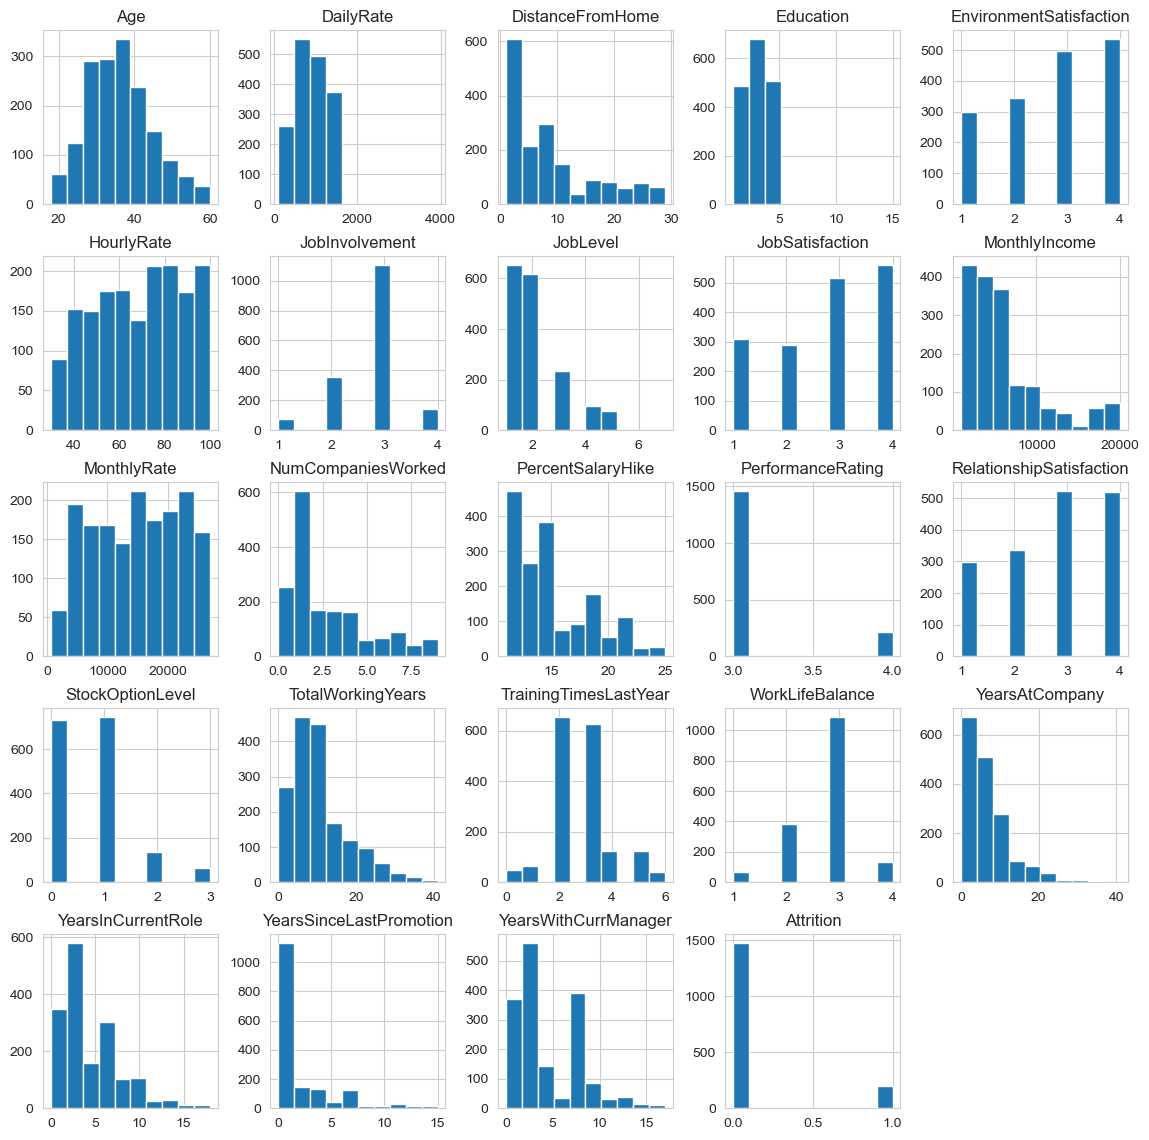

In [9]:
# Creating histograms
df[num_cols].hist(figsize = (14, 14))

plt.show()

**Observations:**

- **The age distribution is close to a normal distribution**, with the majority of employees between the ages of 25 and 50.
- **DistanceFromHome also has a right-skewed distribution**, meaning most employees live close to work but there are a few that live further away.
- **MonthlyIncome and TotalWorkingYears are skewed to the right**, indicating that the majority of workers are in entry / mid-level positions in the organization.
- **The percentage salary hike is skewed to the right**, which means employees are mostly getting lower percentage salary increaseS.
- **The YearsAtCompany variable distribution shows a good proportion of workers with 10+ years**, indicating a significant number of loyal employees at the organization. 
- **The YearsInCurrentRole distribution has three peaks at 0, 2, and 7.** There are a few employees that have even stayed in the same role for 15 years and more.
- **The YearsSinceLastPromotion variable distribution indicates that some employees have not received a promotion in 10-15 years and are still working in the organization.** These employees are assumed to be high work-experience employees in upper-management roles, such as co-founders, C-suite employees, etc.
- The distributions of DailyRate, HourlyRate, and MonthlyRate appear to be uniform and do not provide much information. It could be that the daily rate refers to the income earned per extra day worked while the hourly rate could refer to the same concept applied for extra hours worked per day. Since these rates tend to be broadly similar for multiple employees in the same department, that explains the uniform distribution they show.

### **Univariate analysis for categorical variables**

In [10]:
# Printing the % sub categories of each category.
for i in cat_cols:
    
    print(df[i].value_counts(normalize = True))
    
    print('*' * 40)

Travel_Rarely        0.769231
Travel_Frequently    0.155635
Non-Travel           0.075134
Name: BusinessTravel, dtype: float64
****************************************
Research & Development    0.695886
Sales                     0.280859
Human Resources           0.023256
Name: Department, dtype: float64
****************************************
Life Sciences       0.462135
Medical             0.327370
Marketing           0.090638
Technical Degree    0.063208
Other               0.048897
Human Resources     0.007752
Name: EducationField, dtype: float64
****************************************
Male      0.634466
Female    0.365534
Name: Gender, dtype: float64
****************************************
Sales Executive              0.211688
Research Scientist           0.205128
Laboratory Technician        0.199165
Manufacturing Director       0.116875
Healthcare Representative    0.092427
Manager                      0.066190
Sales Representative         0.045915
Research Director          

### **Observations:**

- **The employee attrition rate is ~12%.**
- **Around 24% of the employees are working overtime.** This number appears to be on the higher side and might indicate a stressed employee work-life.
- 77% of the employees have traveled rarely, while around 16% have to travel frequently.
- Around 46% of the employees come from an educational background in the Life Sciences and Medical fields.
- Around 70% of employees work in the Research & Development department of the organization.

**Now that we have explored our data, let's build the model.**

## **Model Building - Approach**

1. Data preparation.
2. Partition the data into a train and test set.
3. Build a model on the train data.
4. Tune the model if required.
5. Test the data on the test set.

### **Data preparation**

**Creating dummy variables for the categorical variables**

In [28]:
# Creating a list of columns for which we will create dummy variables
to_get_dummies_for = cat_cols

# Creating dummy variables
df = pd.get_dummies(data = df, columns = to_get_dummies_for, drop_first = True)

In [29]:
df.Attrition

0       0
1       0
2       0
3       0
4       1
       ..
1672    0
1673    0
1674    1
1675    0
1676    0
Name: Attrition, Length: 1677, dtype: int64

**Separating the independent variables (X) and the dependent variable (Y)**

In [30]:
# Separating the target variable and other variables

Y = df.Attrition

X = df.drop(['Attrition'], axis = 1)

In [31]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1677 entries, 0 to 1676
Series name: Attrition
Non-Null Count  Dtype
--------------  -----
1677 non-null   int64
dtypes: int64(1)
memory usage: 13.2 KB


**Splitting the data into 70% train and 30% test set**

In [32]:
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

### **Model evaluation criterion**

**Minimize the area under the ROC curve between the predicted probability and the observed target.**


## **Building the model**

We will be building 2 different models:

- **Decision Tree**
- **Random Forest**


### **Building a Decision Tree Model**

* We will build our model using the **DecisionTreeClassifier function.** 
* If the frequency of class A is 12% and the frequency of class B is 88%, then class B will become the dominant class and **the decision tree will become biased toward the dominant class.**
* **class_weight is a hyperparameter** for the decision tree classifier, and in this case, we can pass a dictionary {0:0.12, 1:0.88} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

In [35]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight = {0: 0.12, 1: 0.88}, random_state = 1)

In [36]:
# Fitting decision tree model
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.12, 1: 0.88}, random_state=1)

**Let's check the model performance of decision tree**

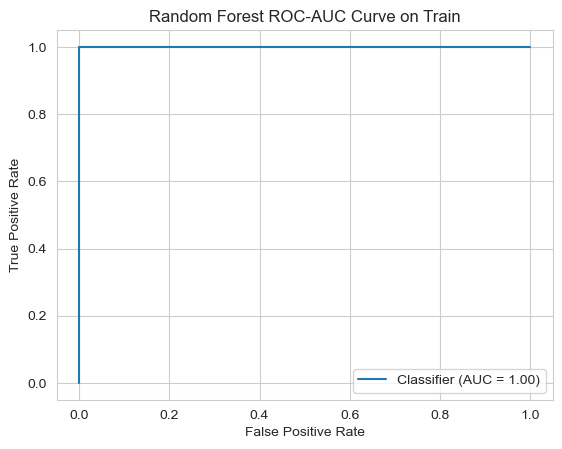

In [41]:
# Checking performance on the training dataset
train_preds = pd.DataFrame({'Attrition': y_train, 'Attrition_pred': dt.predict(x_train)})

RocCurveDisplay.from_predictions(test_preds['Attrition'], train_preds['Attrition_pred'])
plt.title('Random Forest ROC-AUC Curve on Train')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

**Observation:**

- The Decision tree is giving a **100% AUC score for all metrics on the training dataset.**

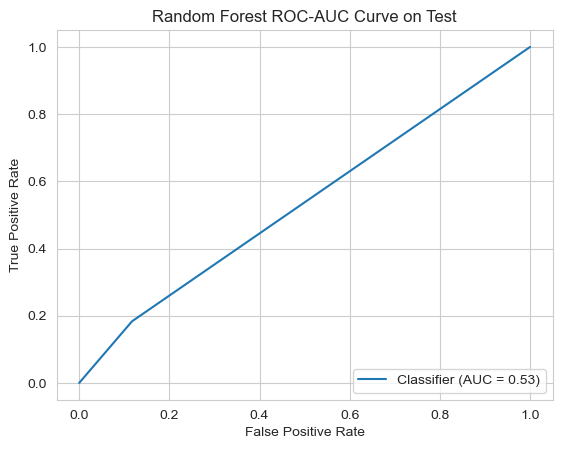

In [42]:
# Checking performance on the test dataset
test_preds = pd.DataFrame({'Attrition': y_test, 'Attrition_pred': dt.predict(x_test)})

RocCurveDisplay.from_predictions(test_preds['Attrition'], test_preds['Attrition_pred'])
plt.title('Random Forest ROC-AUC Curve on Test')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

**Observations:**

- The Decision Tree works well on the training data but **not so well on the test data** as the AUC is 0.53 in comparison to 1 for the training dataset, i.e., the Decision Tree is overfitting the training data.

**Let's plot the feature importance and check the most important features.**

In [54]:
pd.DataFrame(dt_imp, index = X.columns)

,0
Age,5.348373e-02
DailyRate,4.244302e-02
DistanceFromHome,5.614347e-02
Education,4.250230e-02
EnvironmentSatisfaction,3.956375e-02
HourlyRate,3.938284e-02
JobInvolvement,2.724685e-02
JobLevel,8.678746e-03
JobSatisfaction,6.408865e-03
MonthlyIncome,1.114044e-01


<Figure size 1200x1400 with 0 Axes>

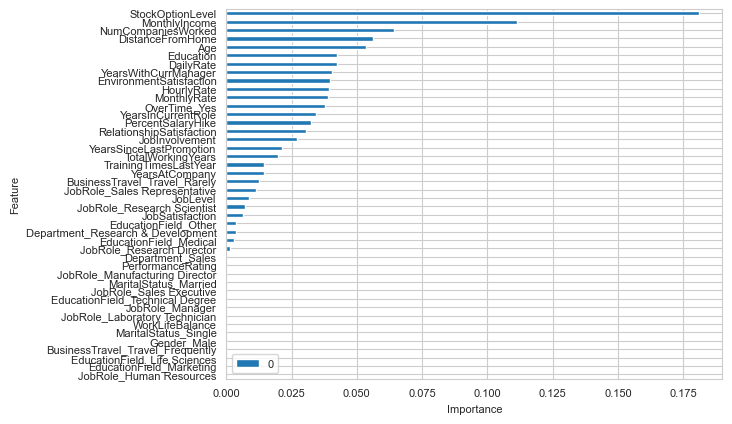

In [75]:
# Plot the feature importance
dt_imp = dt.feature_importances_
plt.figure(figsize = (12, 14))
pd.DataFrame(dt_imp, index = X.columns).sort_values(by = 0).plot(kind = 'barh')

plt.ylabel('Feature')
#plt.legend('Importance')
plt.rcParams.update({'font.size': 8})
plt.xlabel('Importance')
plt.show();

**Observations:**

- According to the Decision Tree, **Stock Option Level is the most important feature, followed by Monthly Income, number of other companies worked at, and distance from home.**
- This might signify that people who are at risk of attrition have fewer stock options, make less and have less experience.
- The other important features are `DailyRate`, `Age`, `YearsinCurrentRole`, and `PercentSalaryHike`.

**Let's try to tune the model and check if we could improve the results.**

### **Tuning Models**

### **Using GridSearch for Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion{“gini”,  “entropy”}**

The function is to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

In [98]:
# Choose the type of classifier
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.12, 1: 0.88}, random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(roc_auc_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.12, 1: 0.88}, max_depth=2,
                       min_samples_leaf=5, random_state=1)

In [78]:
# Checking performance on the training dataset
y_train_pred_dt = dtree_estimator.predict(x_train)

roc_auc_score(y_train, y_train_pred_dt)

0.7071359424699212

**Observation:**

- In comparison to the model with default values of hyperparameters, **the performance on the training set has gone down significantly.** This makes sense because we are trying to reduce overfitting.

In [79]:
# Checking performance on the test dataset
y_test_pred_dt = dtree_estimator.predict(x_test)

roc_auc_score(y_test, y_test_pred_dt)

0.6587837837837838

**Observations:**

- The tuned model is performing better than the model with default values of hyperparameters.
- This model is still slightly overfitting the training data: it gives a slightly better result on the train dataset than the test dataset.

**Let's look at the feature importance of this model and try to analyze why this is happening.**

<Figure size 1200x1400 with 0 Axes>

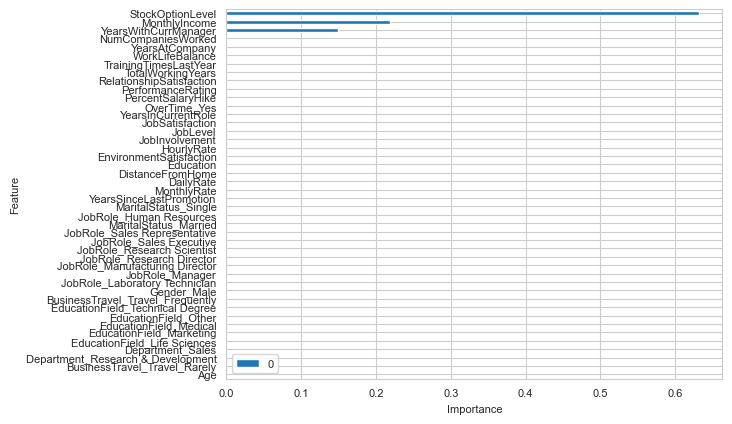

In [81]:
# Plot the feature importance
dtree_estimator_imp = dtree_estimator.feature_importances_
plt.figure(figsize = (12, 14))
pd.DataFrame(dtree_estimator_imp, index = X.columns).sort_values(by = 0).plot(kind = 'barh')

plt.ylabel('Feature')
#plt.legend('Importance')
plt.rcParams.update({'font.size': 8})
plt.xlabel('Importance')
plt.show();

**Observations:**

- After tuning the model we are getting that only 3 features are important. It seems like **the model is having high bias**, as it has over-simplified the problem and is not capturing the patterns associated with other variables.
- According to this model, `StockOptionLevel`, `YearsWithCurrManager`, and `MonthlyIncome` are the 3 most important features that describe why an employee is leaving the organization, which might imply that employees doing overtime may feel that their remuneration is not enough for their efforts.

**Let's plot the tree** and check if the assumptions about overtime income.

As we know the decision tree keeps growing until the nodes are homogeneous, i.e., it has only one class, and the dataset here has a lot of features, it would be hard to visualize the whole tree with so many features. Therefore, we are only visualizing the tree up to **max_depth = 4**.

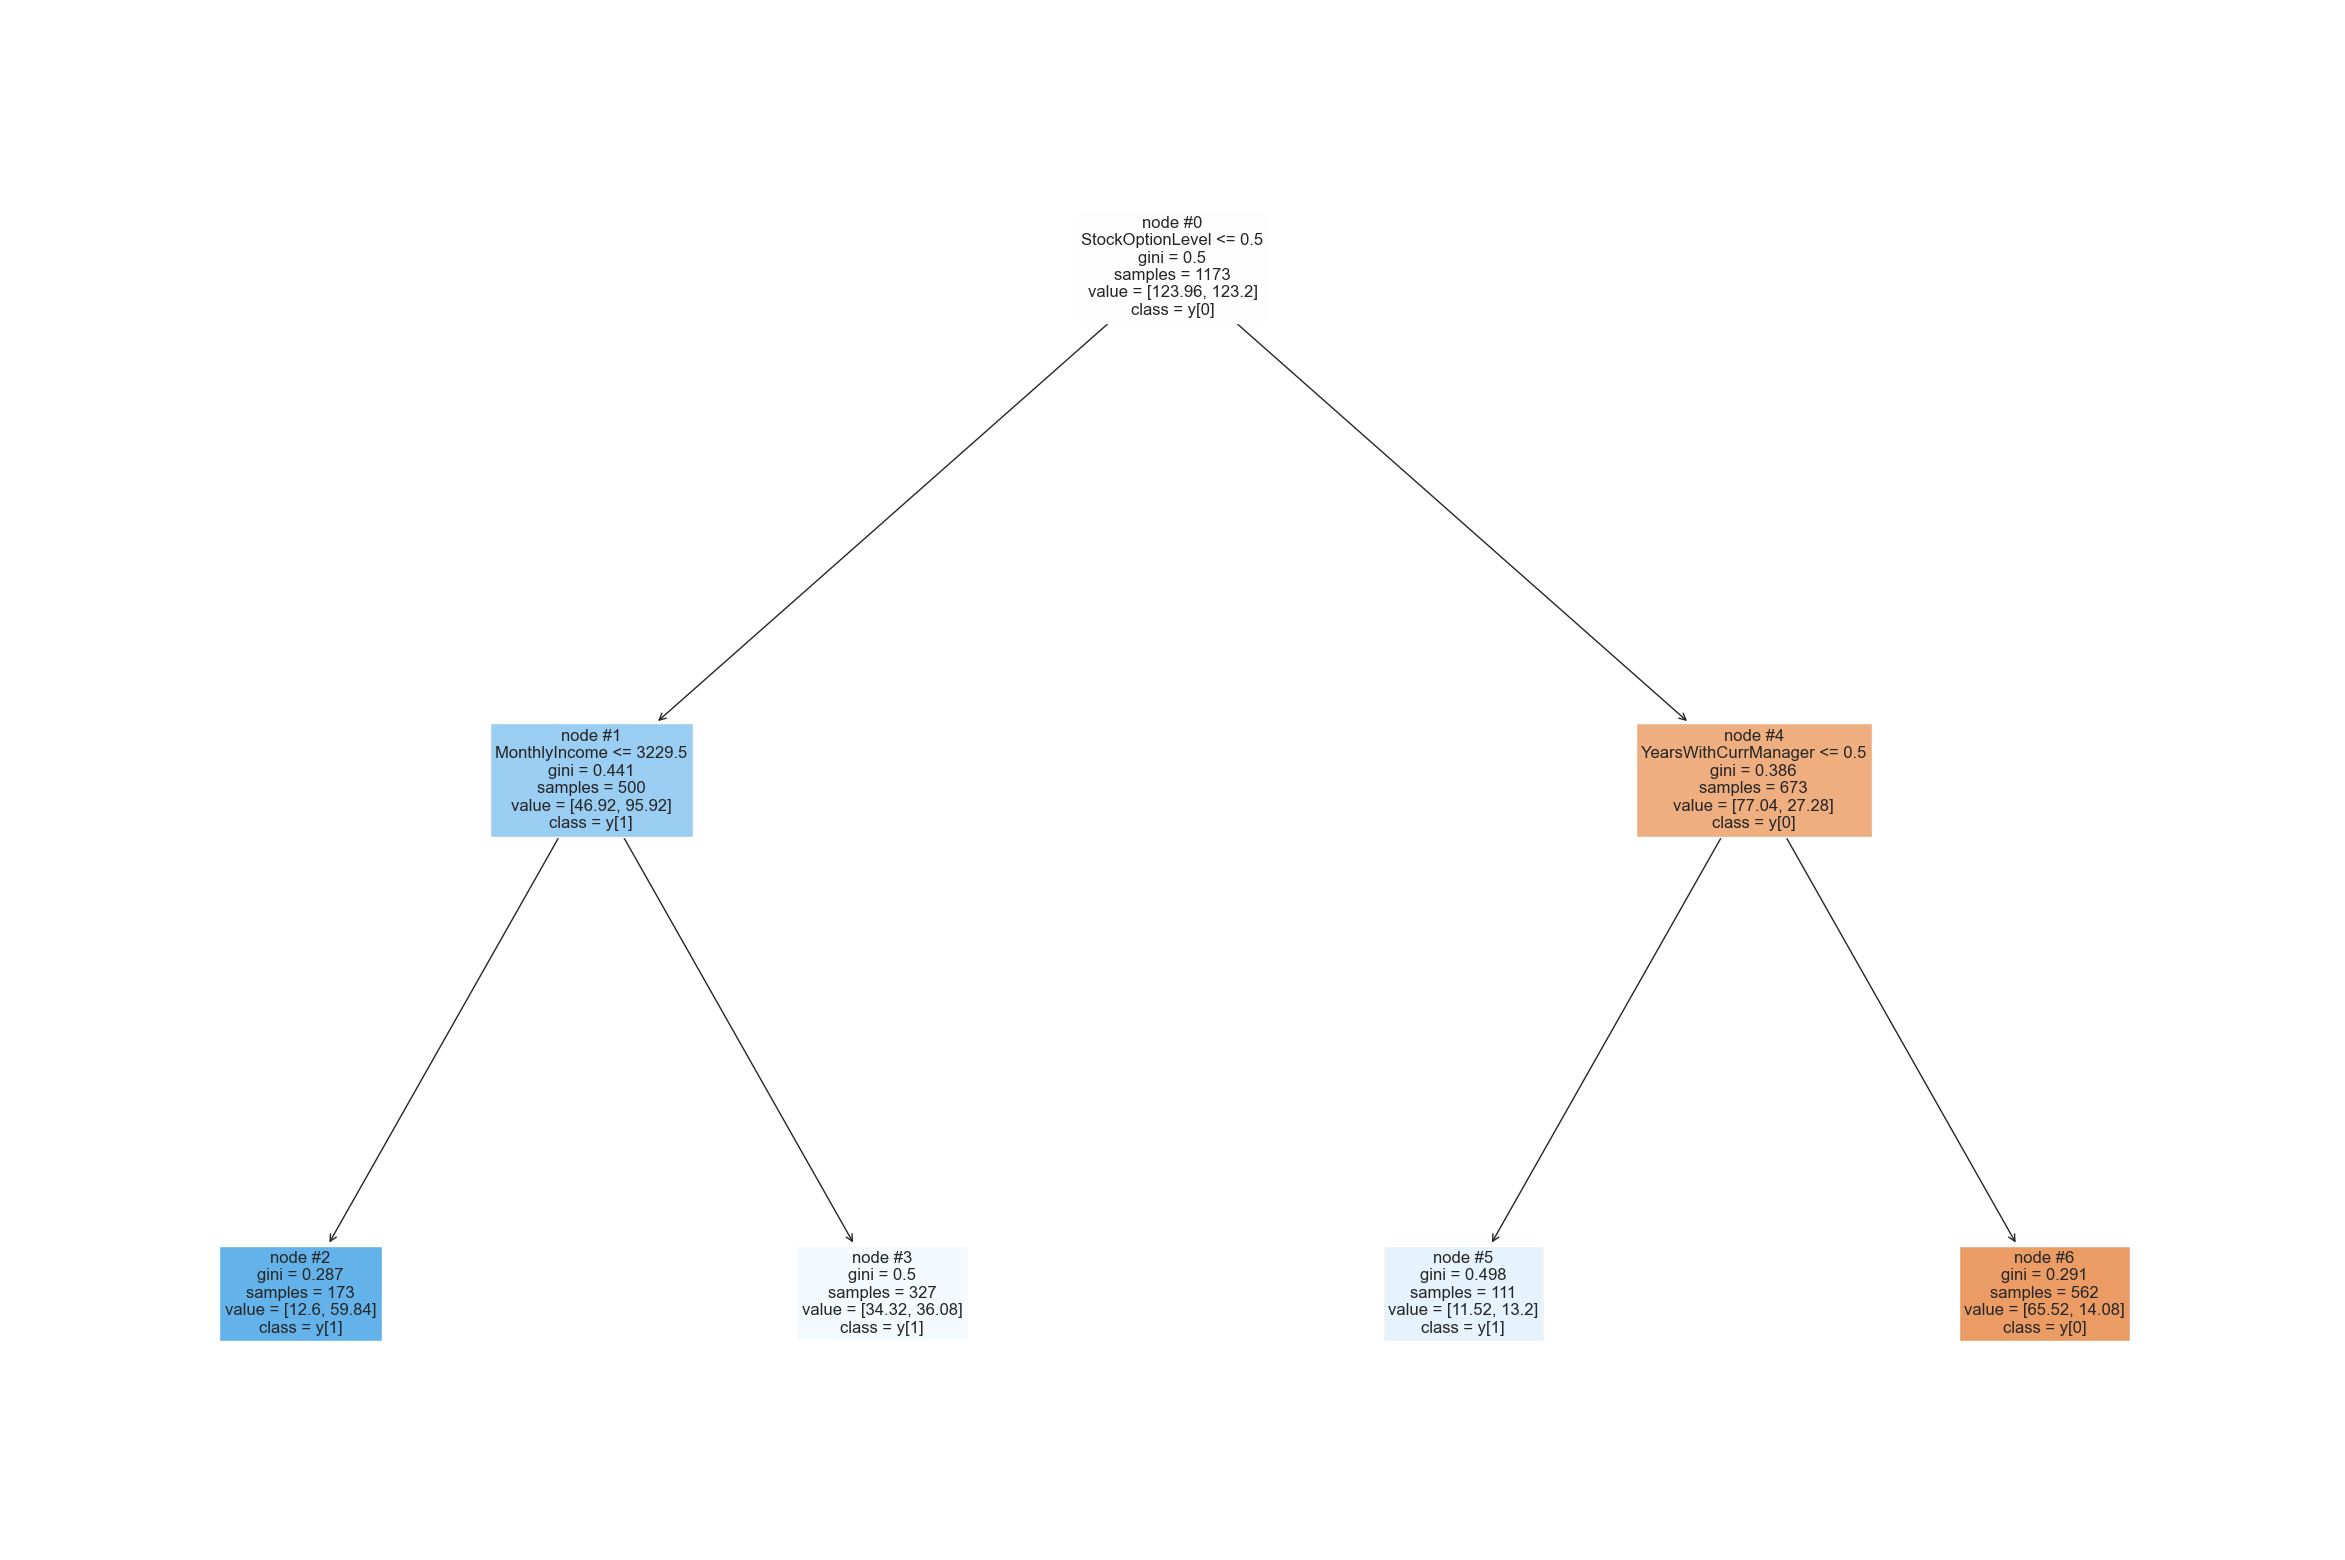

In [83]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dtree_estimator, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

### **Note:**

Blue leaves represent the attrition, i.e., **y[1]** and the orange leaves represent the non-attrition, i.e., **y[0]**. Also, the more the number of observations in a leaf, the darker its color gets.

**Observations:**

- Employees with no stock options and monthly income less than 3230 are more likely to attrite.
- Employees, even if they have stock options, are more likely to attrite if they have not been with their current manager for more than six months.an income over 3751.5 units but working as sales executives and living far from home have a high chance of attriting.

### **Building the Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample, a decision tree makes a prediction. 

**The results from all the decision trees are combined and the final prediction is made using voting (for classification problems) or averaging (for regression problems).**

In [84]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.12, 1: 0.88}, random_state = 1)

rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.12, 1: 0.88}, random_state=1)

In [85]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(x_train)

roc_auc_score(y_train, y_pred_train_rf)

1.0

**Observation:**

- The Random Forest is giving a **100% score for the auc score on the training dataset.**

In [86]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(x_test)

roc_auc_score(y_test, y_pred_test_rf)

0.5216216216216216

**Observations:**

- The Random Forest classifier **seems to be overfitting the training data**. The AUC on the training data is 1, while the AUC on the test data is only ~ 0.52.

**Let's check the feature importance of the Random Forest**

<Figure size 1200x1400 with 0 Axes>

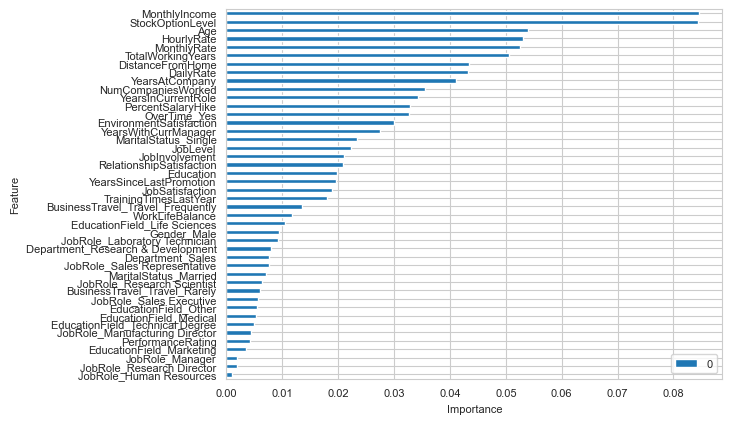

In [88]:
# Plot the feature importance
rf_imp = rf_estimator.feature_importances_
plt.figure(figsize = (12, 14))
pd.DataFrame(rf_imp, index = X.columns).sort_values(by = 0).plot(kind = 'barh')

plt.ylabel('Feature')
#plt.legend('Importance')
plt.rcParams.update({'font.size': 8})
plt.xlabel('Importance')
plt.show();

**Observations:**


- The Random Forest further verifies the results from the decision tree that the most important features are `MonthlyIncome`, and `StockOptionLevel`.
- Not having stock options is also a driver for attrition - this feature seems to have good importance in both the decision tree and random forest models. This could be related to the junior level employees and their lack of stock options - with the additional burden of a lower salary and working overtime, those without stock options could also be attriting more.
- Age is also a key feature, probably as younger employees are less likely to care about job security and want to advance their careers by moving laterally.
- Other features like, total working years and distance from home also seem to be intuitive in explaining attrition likelihood, as people who have worked at the company for many years are probably going to stay loyal to the current organization and accordingly have a lower risk of attrition, while if an employee is not getting paid enough, that might demotivate them and lead to a higher likelihood of attriting as well.
- Other features such as number of companies worked at, years in current role and percent salary hike also play a crucial role in knowing whether an employee will attrite or not.

### **Tuning the Random Forest classifier**

**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node.

**min_samples_leaf**: The minimum number of samples required to be at a leaf node. 

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split.

- If “auto”, then max_features=sqrt(n_features).

- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.

In [100]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.12, 1: 0.88}, random_state = 1)

# Grid of parameters to choose from
params_rf = {  
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto']
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(roc_auc_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5, n_jobs=-1)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [101]:
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.12, 1: 0.88}, max_features=0.7,
                       min_samples_leaf=3, n_estimators=250, random_state=1)

In [102]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train)

roc_auc_score(y_train, y_pred_train_rf_tuned)

0.9990319457889643

In [103]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(x_test)

roc_auc_score(y_test, y_pred_test_rf_tuned)

0.568018018018018

**Observations:**

- The tuned model is severely overfitting the training dataset, and **it shows poor performance on the test dataset.**

## **Conclusion**

- The best model we have got so far is the tuned decision tree model which is giving ~ 66% AUC on the test data.

## **Boosting Models**

Let's now look at the other kind of Ensemble technique knowns as Boosting

### **XGBoost**
- XGBoost stands for Extreme Gradient Boosting.
- XGBoost is a tree-based ensemble machine learning technique that improves prediction power and performance by improvising on the Gradient Boosting framework and incorporating reliable approximation algorithms. It is widely utilized and routinely appears at the top of competition leader boards in data science.

In [105]:
# Installing the xgboost library using the 'pip' command.
!pip install xgboost

In [106]:
# Importing the AdaBoostClassifier and GradientBoostingClassifier [Boosting]
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# Importing the XGBClassifier from the xgboost library
from xgboost import XGBClassifier

In [107]:
# Adaboost Classifier
adaboost_model = AdaBoostClassifier(random_state = 1)

# Fitting the model
adaboost_model.fit(x_train, y_train)

# Model Performance on the test data

y_pred_test_adaboost = adaboost_model.predict(x_test)

roc_auc_score(y_test, y_pred_test_adaboost)

0.6259009009009008

In [108]:
# Gradient Boost Classifier
gbc = GradientBoostingClassifier(random_state = 1)

# Fitting the model
gbc.fit(x_train, y_train)

# Model Performance on the test data
gbc_perf_test = gbc.predict(x_test)

roc_auc_score(y_test, gbc_perf_test)

0.5936936936936937

In [109]:
# XGBoost Classifier
xgb = XGBClassifier(random_state = 1, eval_metric = 'auc')

# Fitting the model
xgb.fit(x_train,y_train)

# Model Performance on the test data
xgb_perf_test = xgb.predict(x_test)

roc_auc_score(y_test, xgb_perf_test)

0.5842342342342342

**Observations:**

* **The Tuned Decision Tree gives the best performance for this dataset.**
* **In boosting algorithms, Adaboost has the best score.**

In [118]:
test = pd.read_csv('test.csv')

In [119]:
ids = test['id']

In [120]:
test = test.drop(['id'], axis = 1)

In [121]:
test = test.drop(['EmployeeCount', 'Over18', 'StandardHours'] , axis = 1)

In [122]:
# Creating dummy variables
test = pd.get_dummies(data = test, columns = to_get_dummies_for, drop_first = True)

In [123]:
test_pred_dt = dtree_estimator.predict(test)

In [131]:
preds = pd.DataFrame(test_pred_dt)
out = pd.concat([ids, preds[0]], axis=1)
out = out.rename(columns = {0:'Attrition'})
submission = out.to_csv('submission.csv', index = False)